In [25]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('student-data.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.isna().sum() # check for missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
data.duplicated().sum() # check for duplicates

0

In [10]:
data.info(), data.shape # check for data type & shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


(None, (1000, 8))

In [11]:
data.nunique() # check for unique values in columns

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
data.describe() # statistics of the data

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
# categories in each columns
print("Gender : ", data['gender'].unique())
print("Race Ethinicity : ", data['race_ethnicity'].unique())
print("Parental Education : ", data['parental_level_of_education'].unique())
print("Lunch : ", data['lunch'].unique())
print("Test preparation course : ", data['test_preparation_course'].unique())

Gender :  ['female' 'male']
Race Ethinicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
Parental Education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch :  ['standard' 'free/reduced']
Test preparation course :  ['none' 'completed']


In [17]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
num_features + list(" ") + cat_features

['math_score',
 'reading_score',
 'writing_score',
 ' ',
 'gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [21]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average'] = round(data['total_score']/3, 2)
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [23]:
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()
math_full = data[data['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [24]:
reading_less_33 = data[data['reading_score'] <= 33]['average'].count()
writing_less_33 = data[data['writing_score'] <= 33]['average'].count()
math_less_33 = data[data['math_score'] <= 33]['average'].count()

print(f'Number of students with less than 33 marks in Maths: {math_less_33}')
print(f'Number of students with less than 33 marks in Writing: {writing_less_33}')
print(f'Number of students with less than 33 marks in Reading: {reading_less_33}')

Number of students with less than 33 marks in Maths: 20
Number of students with less than 33 marks in Writing: 14
Number of students with less than 33 marks in Reading: 11


<Axes: xlabel='average', ylabel='Count'>

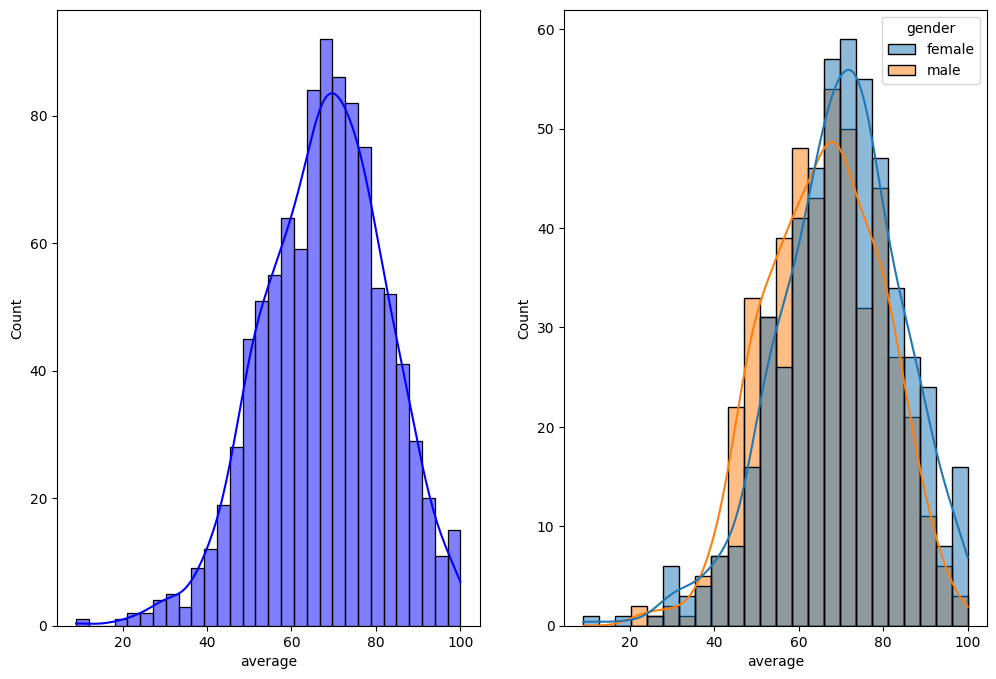

In [36]:
fig, axs = plt.subplots(1,2, figsize=(12,8))
plt.subplot(121)
sns.histplot(data=data, x='average', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data=data, x='average', kde=True, hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

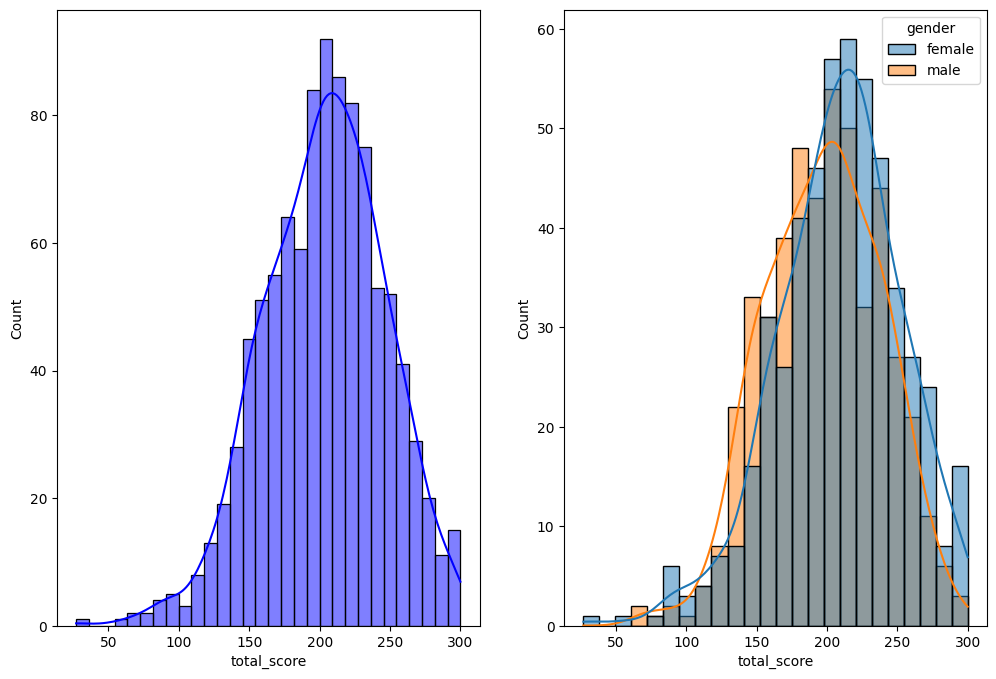

In [35]:
fig, axs = plt.subplots(1,2, figsize=(12,8))
plt.subplot(121)
sns.histplot(data=data, x='total_score', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data=data, x='total_score', kde=True, hue='gender')

<Axes: xlabel='average', ylabel='Count'>

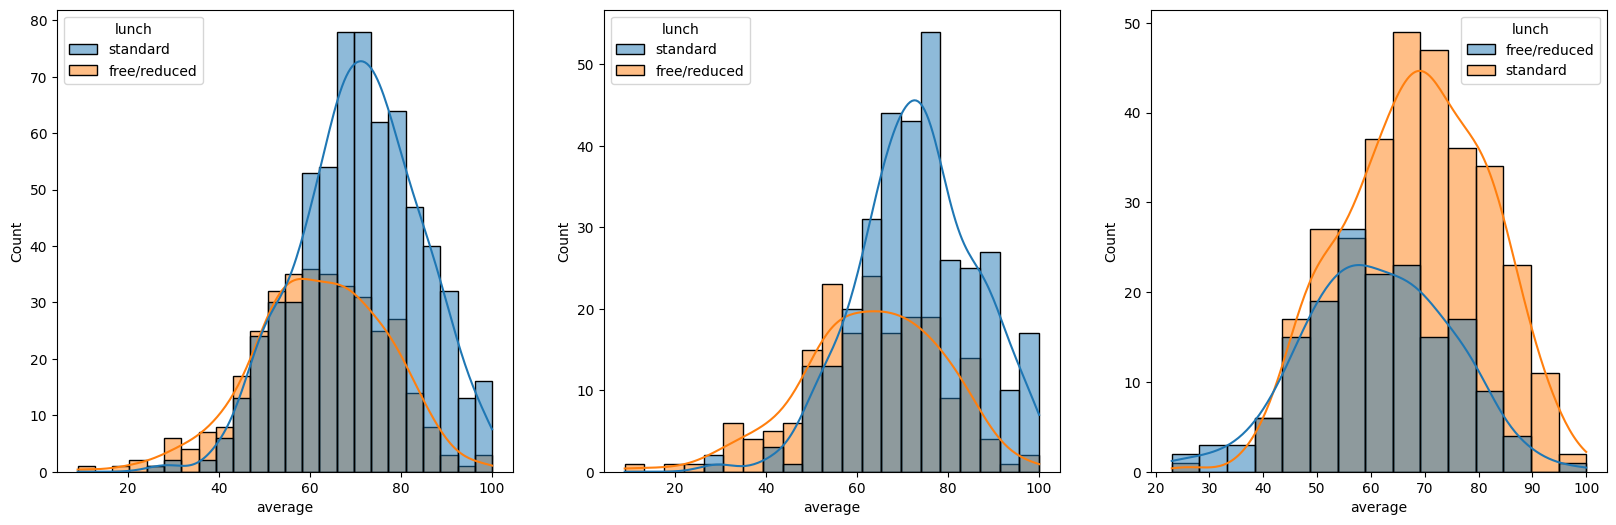

In [60]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='average', kde=True, hue='lunch')
plt.subplot(1, 3, 2)
sns.histplot(data=data[data.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(1, 3, 3)
sns.histplot(data=data[data.gender=='male'], x='average', kde=True, hue='lunch')

In [62]:
num_features

['math_score', 'reading_score', 'writing_score']

<Axes: xlabel='average', ylabel='Count'>

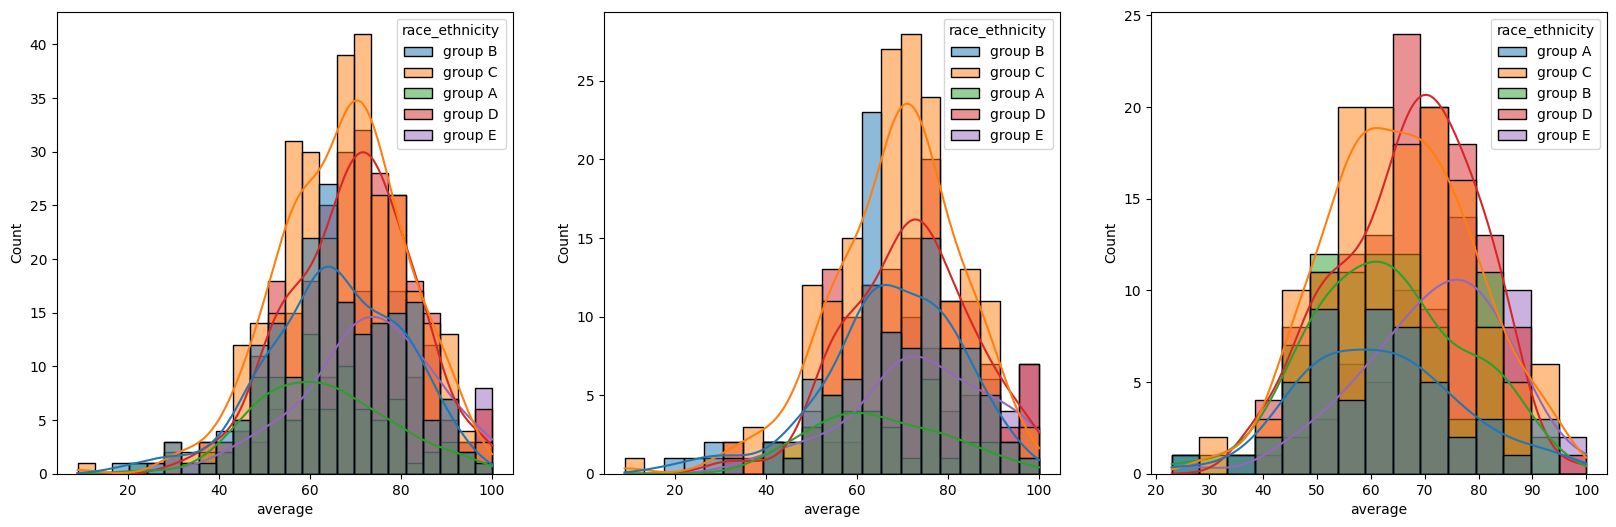

In [59]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='average', kde=True, hue='race_ethnicity')
plt.subplot(1, 3, 2)
sns.histplot(data=data[data.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(1, 3, 3)
sns.histplot(data=data[data.gender=='male'], x='average', kde=True, hue='race_ethnicity')

<Axes: xlabel='average', ylabel='Count'>

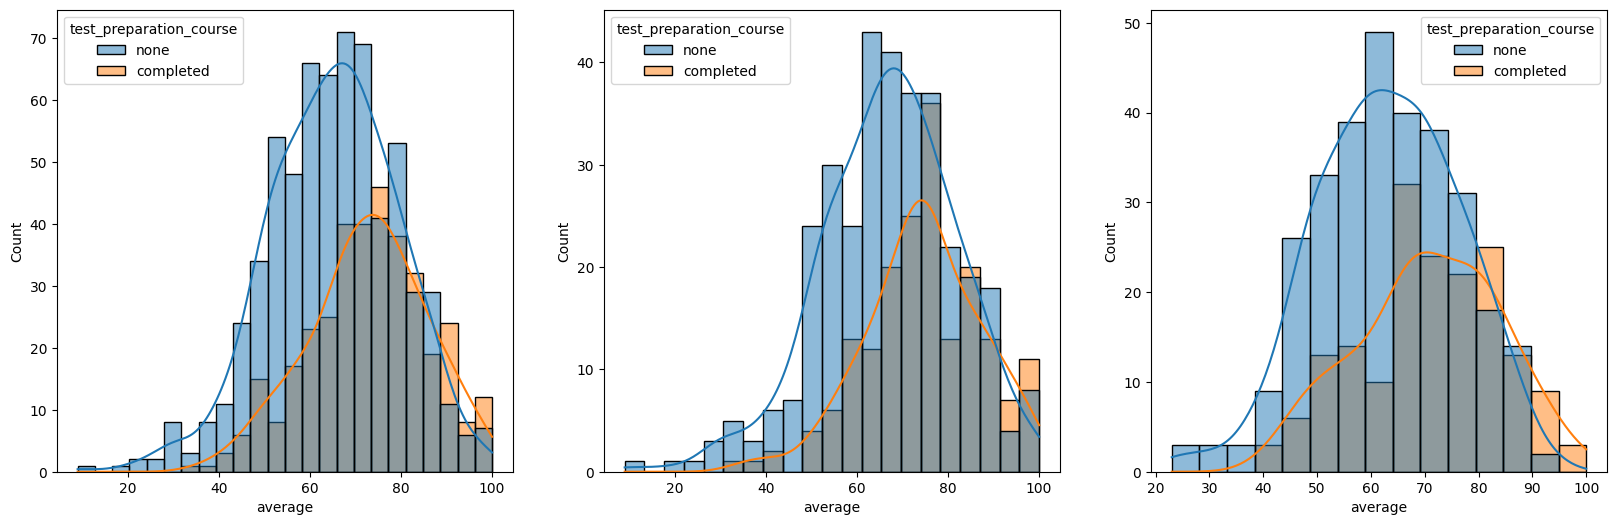

In [61]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='average', kde=True, hue='test_preparation_course')
plt.subplot(1, 3, 2)
sns.histplot(data=data[data.gender=='female'], x='average', kde=True, hue='test_preparation_course')
plt.subplot(1, 3, 3)
sns.histplot(data=data[data.gender=='male'], x='average', kde=True, hue='test_preparation_course')

<Axes: title={'center': 'Writing Scores'}, ylabel='writing_score'>

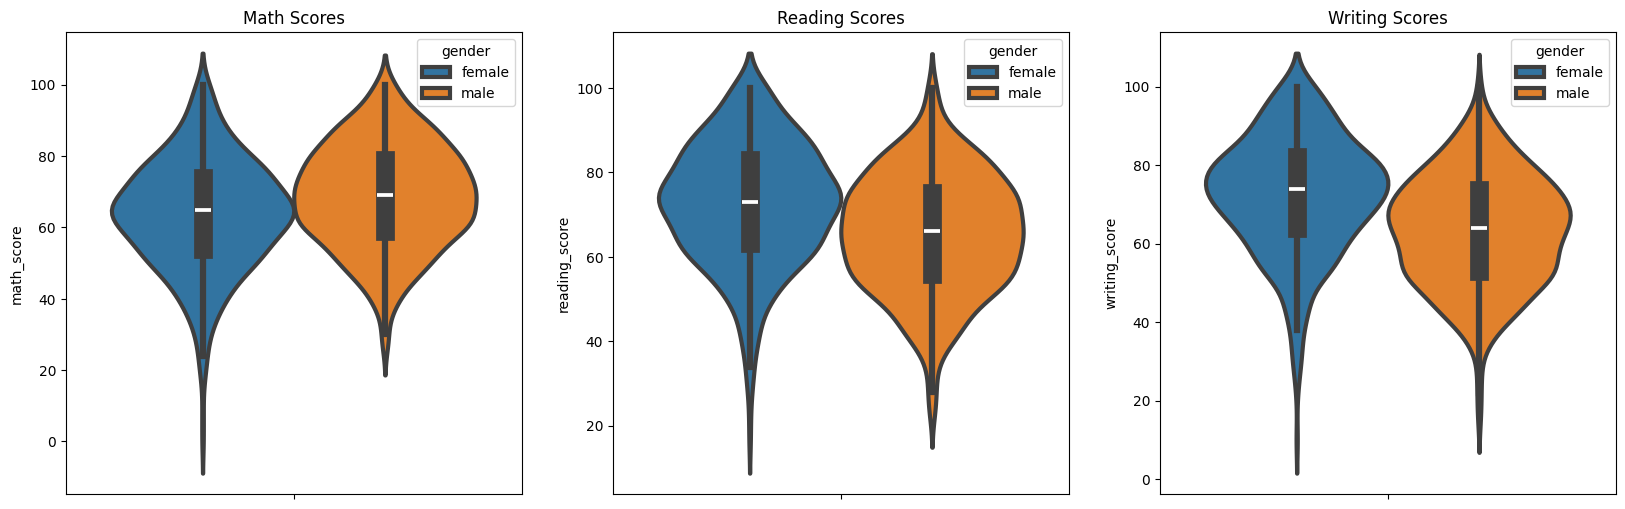

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.title('Math Scores')
sns.violinplot(data=data, y='math_score', hue='gender', linewidth=3)
plt.subplot(1, 3, 2)
plt.title('Reading Scores')
sns.violinplot(data=data, y='reading_score', hue='gender', linewidth=3)
plt.subplot(1, 3, 3)
plt.title('Writing Scores')
sns.violinplot(data=data, y='writing_score', hue='gender', linewidth=3)

In [ ]:
# multivariate analysis
